# Simple Perceptron

In [5]:
import numpy as np

## Simple Perceptron implementation

The Simple Perceptron is divided in five methods:

* **fit**: Learning weights and bias based on the prediction vs actual binary values using a Stochastic Gradient Descent (SGD).
* **weighted_sum**: Returns the input values multiplied by their respective weights plus the bias value.
* **activation_function**: Get the final output based on the weighted sum and the outcome of unit step function.
* **predict**: Using the model predict a value for an specific input.
* **score**: The score is based on expected value and predicted value.


In [25]:
'''
Simple Perceptron implementation. 
This is a simple implementation of the Perceptron algorithm. 
It's used as activation function the unit step function.
'''
class SimplePerceptron:
    def __init__(self, max_iters=10, learning_rate=0.001):
        self.max_iters = max_iters
        self.learning_rate = learning_rate
        self.score_ = 0

    '''
    Stochastic Gradient Descent.
    '''
    def fit(self, X, y):

        # Initialize random weights (# inputs + bias)
        self.weights_ = np.random.random(X.shape[1]) 
        self.bias_ = np.random.random() 

        self.errors_ = []
        for _ in range(self.max_iters):
            errors = 0.0
            ct = 0
            for input, target in zip(X, y):
                # Get teh prediction
                predicted_value = self.predict(input)

                # Update the weights and bias value depending of the difference between
                # the target and the predicted value.
                update = self.learning_rate * (target - predicted_value)

                # Inputs:
                self.weights_ = self.weights_ + update * input
                # Bias:
                self.bias_ = self.bias_ + update 
                
                # Get the error 
                errors += update**2 #mean squared error (MSE) 
                ct += 1
            self.errors_.append(errors/ct)

    '''
    Sum of weighted input plus bias.
    '''
    def weighted_sum(self, X):
        return np.dot(X, self.weights_) + self.bias_

    
    '''
    Activation function is fed the input and execute the unit step function
    to get the output.
    '''
    def activation_function_simoid(self, X):
        return 1.0/(1.0 + np.exp(-self.weighted_sum(X)))

    '''
    Predict a result.
    '''
    def predict(self, X):
        return self.activation_function_simoid(X)

    
    '''
    The score is based on expected value and predicted value.
    '''
    def score(self, X, y):
        error_count = 0
        total_count = 0
        for input, target in zip(X, y):
            output = self.predict(input)
            if(target != output):
                error_count += 1
            total_count += 1
        self.score_ = (total_count - error_count)/total_count
        return self.score_

## Train the SimplePerceptron model

### Create synthetic data
First let's to create some synthetic data to train the perceptron model and print it. 

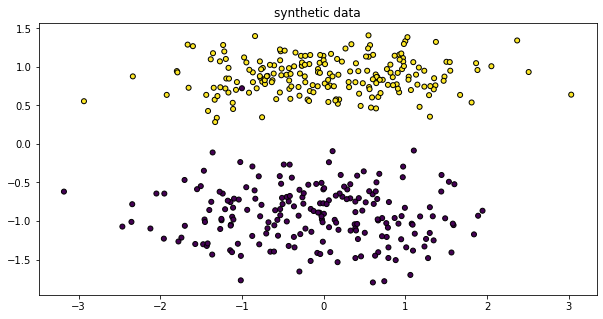

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1, class_sep=0.90, n_samples=400)

plt.figure(figsize=(10,5))
plt.title("synthetic data")
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")
# plt.plot(X_a, X_b, '.r-') 

As you can see it was created two different classes. Omitting some observations between the two classes we can consider that the classes are linearly seperaable.  

### Create the model and train



In [26]:
from sklearn.model_selection import train_test_split
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
#
# Instantiate SimplePerceptron
#
sptrn = SimplePerceptron(max_iters=10, learning_rate=0.0038)
#
# Fit the model
#
sptrn.fit(X_train, y_train)
#
# Score the model
#
sptrn.score(X_test, y_test), sptrn.score(X_train, y_train)

(0.0, 0.0)

The model describe a line with equation $x$<sub>$0$</sub>$ * w$ <sub>$0$</sub> $ + x$<sub>$1$</sub>$ * w$ <sub>$1$</sub> $ + bias = 0$ , plotting this line it's possible to see a separation between the two classes.

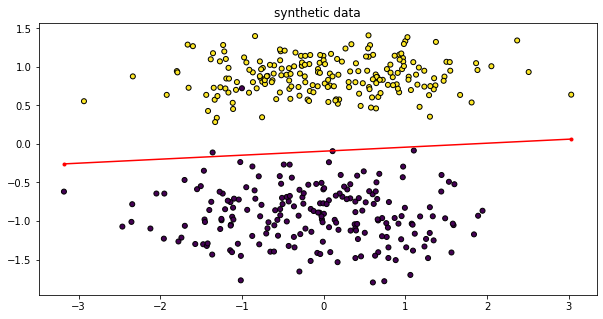

In [27]:

x0 = max(X[:, 0]), min(X[:, 0])
x1 = (max(X[:, 0]) * sptrn.weights_[0] - sptrn.bias_) / sptrn.weights_[1], (min(X[:, 0]) * sptrn.weights_[0] - sptrn.bias_) / sptrn.weights_[1]

plt.figure(figsize=(10,5))
plt.title("synthetic data")
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")
plt.plot(x0, x1, '.r-') 

## Plot number training improvements

Epoch is a machine learning term used to describe one iteration when a model has treined with all of the training data. In our example this is the variable *max_iters* that has is equal to *10*.  

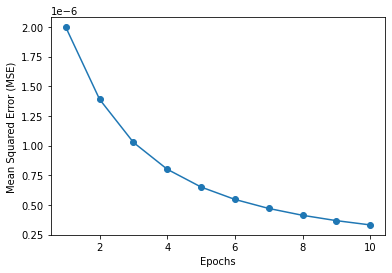

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
 
plt.plot(range(1, len(sptrn.errors_) + 1), sptrn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
 
plt.show()